## Problem Statement
- build a classifier
    - Binary-class classifier
    - Multi-class classifier
- Focus - ? 

#### Load Python libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## <span style="color:red"> Binary Class Classifier </span>

### Problem Statement
- Classify a binary class data
- Show performance in the confusion matrix

In [ ]:
data_binary = pd.read_csv("../data/pima-indians-diabetes.csv")

#### Check Your Data

In [ ]:
# check first 20 rows of the dataset
print(data_binary.head(5))

In [ ]:
# check columns
print(data_binary.columns)

In [ ]:
# check unique labels of data
print(data_binary['class'].unique())

### Train Test Split

In [ ]:
# split data into train and test 
data_array = data_binary.values
Xb = data_array[:,0:8]
yb = data_array[:,8]
seed = 7
test_size = 0.2
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=test_size,
random_state=seed)

print(data_binary.shape)
print(Xb_train.shape)
print(Xb_test.shape)


### Train the model

In [ ]:
model = DecisionTreeClassifier()
#model = DecisionTreeClassifier(max_depth=3)
model.fit(Xb_train, yb_train)

 ### Predict output 

In [ ]:
predicted = model.predict(Xb_test)

In [ ]:
# predicted output comparison
eval_data = pd.DataFrame(yb_test, columns=['true_label'])
eval_data['predicted_label'] = predicted.tolist()
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(eval_data)

### Confusion Matrix

In [ ]:
conf_matrix_binary = confusion_matrix(yb_test, predicted)
print("Confusion Matrix\n================\n", conf_matrix_binary)

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(conf_matrix_binary, display_labels=['1', '0'])
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
fig, ax = plt.subplots(figsize=(5,5))
cmd.plot(ax=ax)



## Make calculations based on Confusion Matrix

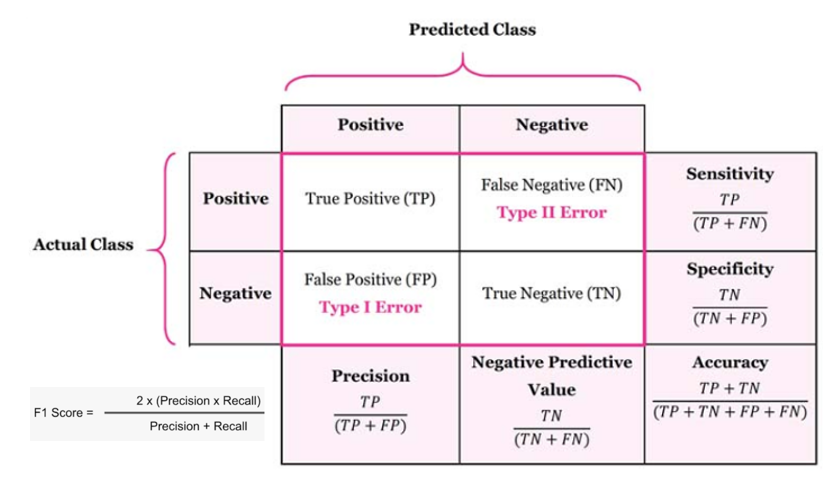

### Plot Model Tree

In [ ]:
#! pip install graphviz

In [ ]:
# Load library
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))

tree.plot_tree(model, filled=True, rounded=True, class_names=['1', '0'], 
               feature_names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'])
plt.show()

In [ ]:
# text representation
text_representation = tree.export_text(model)
with open('decision_tree.log', 'w') as fout:
    fout.write(text_representation)

In [ ]:
# Load library
#import graphviz
#from sklearn import tree
#fig = tree.export_graphviz(model, out_file=None, 
                   #feature_names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'],  
                   #class_names=['class'],
                   #filled=True)

## <span style="color:red"> Multi Class Classifier </span>

### Problem Statement
- Classify a multi-class data
- Construct a multi-class confusion matrix
- Calulate the classification metrics - recall, precision, f1-score.

In [ ]:
# Load data 
data_multi_train = pd.read_csv("../data/train_multi_5Class.csv")

In [ ]:
# Check first 5 rows of the data
print(data_multi_train.head(5))

In [ ]:
# check shape of the data
print(data_multi_train.shape)

In [ ]:
# check columns
print(data_multi_train.columns)

In [ ]:
# check unique labels of data
print(data_multi_train['class'].unique())

### Multi class data details.

- Loading training and testing data separately
- Both the data sets have 29 columns. 
- They 28 features, and 1 label columns
- There are 5 unique labels for the data. 

In [ ]:
# split data into input and target variables 
data_array = data_multi_train.values
X_train = data_array[:,0:28]
y_train = data_array[:,28]


print(data_multi_train.shape)
print(X_train.shape)
print(y_train.shape)

In [ ]:
# define and train classification model
model_multi = DecisionTreeClassifier()
model_multi.fit(X_train, y_train)

#### Load Testing Data

In [ ]:
# Load data 
data_multi_test = pd.read_csv("../data/test_multi_5Class.csv")
# check shape of the data
print(data_multi_test.shape)

In [ ]:
# split data into input and target variables 
data_array = data_multi_test.values
X_test = data_array[:,0:28]
y_test = data_array[:,28]


print(data_multi_test.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Predict labels for test data
predicted_multi = model_multi.predict(X_test)

In [ ]:
## construct confusion matrix
confusion_matrix_multi = confusion_matrix(y_test, predicted_multi)
print(confusion_matrix_multi)

## Classification metrics extracted from confusion matrix 

In [ ]:
# get unique labels
labels = set(y_test)
# calcualte classification metrix from confusion matrix
total_flows = np.sum(confusion_matrix_multi, axis=1)
recall = np.diag(confusion_matrix_multi) / np.sum(confusion_matrix_multi, axis=1)
precision = np.diag(confusion_matrix_multi) / np.sum(confusion_matrix_multi, axis=0)
f1_Score = [2 * (a * b) / (a + b) for a, b in zip(precision, recall)]
df_conf_matrix = pd.DataFrame(confusion_matrix_multi, columns=labels, index=labels)
df_conf_matrix['total_flows'] = total_flows
df_conf_matrix['recall'] = np.round(recall * 100, 2)
df_conf_matrix['precision'] = np.round(precision * 100, 2)
df_conf_matrix["F1_score"] = np.round(np.array(f1_Score) * 100, 2)

print("\nMulti class Confuaion Matrix\n==============================\n")
with pd.option_context('expand_frame_repr', False):
    print(df_conf_matrix)

In [ ]:
labels = set(y_test)
total_flows = np.sum(confusion_matrix_multi, axis=1)
recall = np.diag(confusion_matrix_multi) / np.sum(confusion_matrix_multi, axis=1)
precision = np.diag(confusion_matrix_multi) / np.sum(confusion_matrix_multi, axis=0)
_weighted_precision = [[a * b for a, b in zip(*l)] for l in zip(np.array(confusion_matrix_multi).T.tolist(),
	                                                                [[x / y for y in total_flows] for x in
	                                                                 total_flows])]
weighted_precision = np.diag(np.array(confusion_matrix_multi).T.tolist()) / [sum(l) for l in _weighted_precision]
f1_Score = [2 * (a * b) / (a + b) for a, b in zip(weighted_precision, recall)]
df_conf_matrix = pd.DataFrame(confusion_matrix_multi, columns=labels, index=labels)
df_conf_matrix['total'] = total_flows
df_conf_matrix['recall'] = np.round(recall * 100, 2)
df_conf_matrix['precision'] = np.round(precision * 100, 2)
df_conf_matrix['weighted_precision'] = np.round(weighted_precision * 100, 2)
df_conf_matrix["f1_score"] = np.round(np.array(f1_Score) * 100, 2)

print("\nMulti class Confuaion Matrix\n==============================\n")
with pd.option_context('expand_frame_repr', False):
    print(df_conf_matrix)
	